## Random Forrest

## Import libraries

In [6]:
%load_ext autoreload
%autoreload 2

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Retrieve data

In [12]:
path_to_csv = "/Users/emilyanderson/Desktop/HR_Engagement_Sat_Sales_UpdatedV4.0.csv"
data = pd.read_csv(path_to_csv)

In [11]:
pd.set_option('display.max_columns', None)
print(data.shape)
data.head()

(14999, 62)


,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


## Missing data handling (approximation 1 : select full columns only)

In [20]:
data = data.drop(columns=['ID'])
print(data.shape)

(14999, 50)


In [21]:
filling = data.count()/len(data) == 1
filling = filling[filling == True]
full_col_names = filling.index.to_list()
full_col_names

data = data[full_col_names]
print(data.shape)
data.head()

(14999, 50)


,Department,GEO,Role,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,Operations,US,VP,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,sales,low,M,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,Sales,UK,Senior Director,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,accounting,low,F,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,Finance,France,Senior Director,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,Human Resources,China,Senior Director,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,IT,Korea,Director,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,sales,low,F,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


## Defining X (features) and Y (targets)

In [22]:
X = data.drop('left_Company', axis=1)
y = data['left_Company'].astype(int)

## Creating the pipeline and data preprocessing

In [26]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessors for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluating the model

In [30]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2286
           1       1.00      1.00      1.00       714

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Confusion Matrix:
[[2286    0]
 [   0  714]]


## Feature importance

In [32]:
feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features).tolist() + \
                preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("Random Forest Feature Importance:")
print(rf_feature_importance)

Random Forest Feature Importance:
             Feature  Importance
11  EMP_Engagement_2    0.225553
12  EMP_Engagement_3    0.181618
13  EMP_Engagement_4    0.156462
10  EMP_Engagement_1    0.153418
14  EMP_Engagement_5    0.104299
..               ...         ...
52        GEO_France    0.000000
53         GEO_Japan    0.000000
65          sales_IT    0.000000
64           Role_VP    0.000000
79          Gender_M    0.000000

[80 rows x 2 columns]


/var/folders/vs/nrs0qypx1vj1q0ff83dkt1qm0000gn/T/ipykernel_86549/2076879150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.sort_values(by='Importance', ascending=False), palette='viridis')


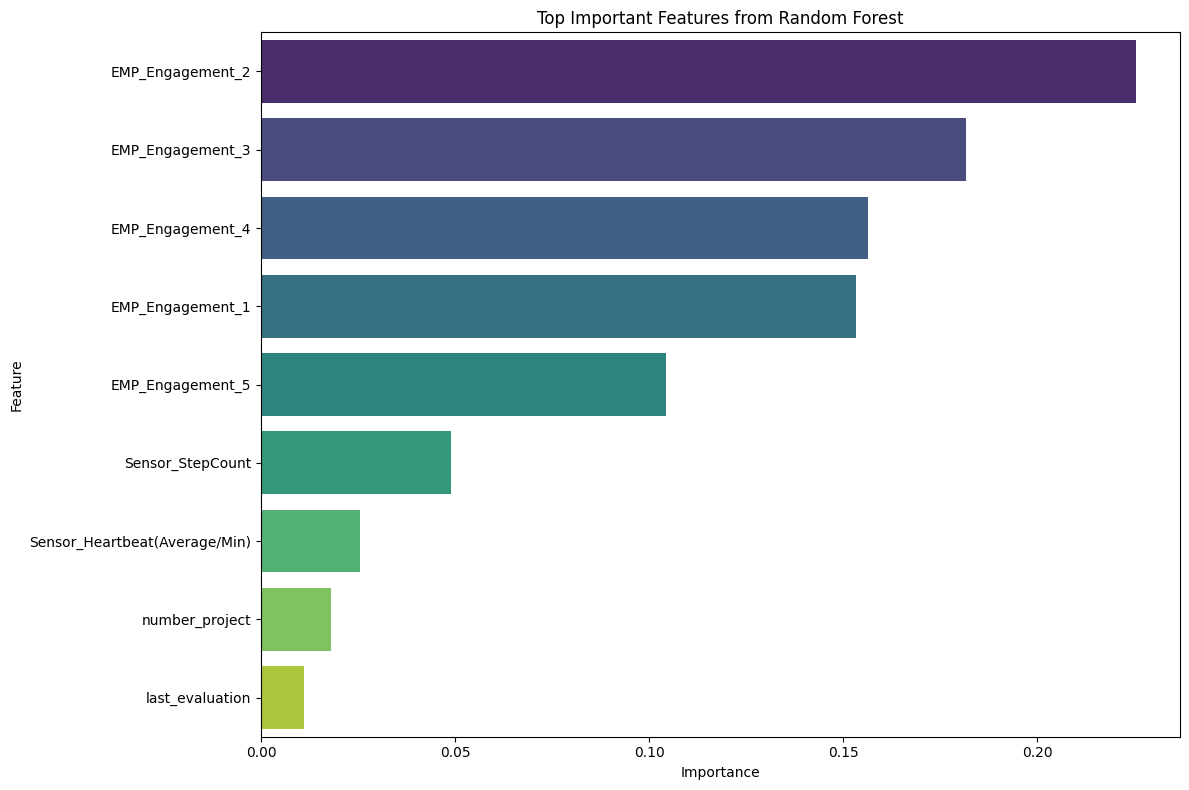

In [38]:
rf_feature_importance = rf_feature_importance[rf_feature_importance['Importance'] > 0]

# Plotting feature importance using Seaborn for better visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.sort_values(by='Importance', ascending=False), palette='viridis')
plt.title('Top Important Features from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()